In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math

In [2]:
df = pd.read_csv('nyt16.csv', sep=',')

The Dataframe has 5 columns. The first one shows the age, the second one the gender 0=female; 1=male, Impressions range from 0-18 and signed_in is either 1=yes or 0=no. The first thing to do is delete all rows which are not signed in.

In [3]:
df = df.drop(df[df.Signed_In == 0].index)

Interesting to plot is the density of impressions and clicks for both genders.

Gender
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

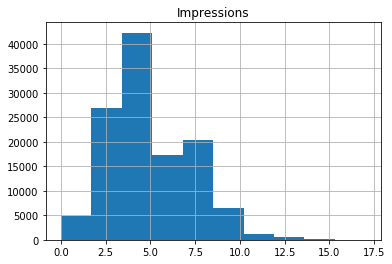

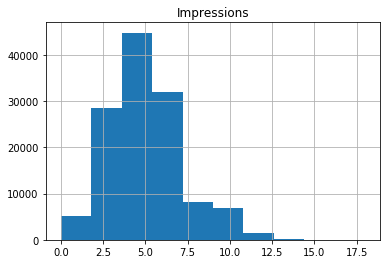

In [4]:
df.groupby('Gender').hist(column='Impressions')

In [5]:
df['ageRange'] = pd.cut(df.Age, [1, 18, 24, 34, 44, 54, 64], include_lowest=True)

Here we can see the density of how many ads are shown for the different age ranges.

ageRange
(0.999, 18.0]    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
(18.0, 24.0]     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
(24.0, 34.0]     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
(34.0, 44.0]     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
(44.0, 54.0]     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
(54.0, 64.0]     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

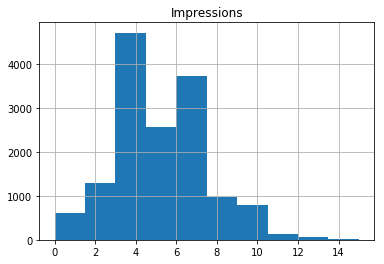

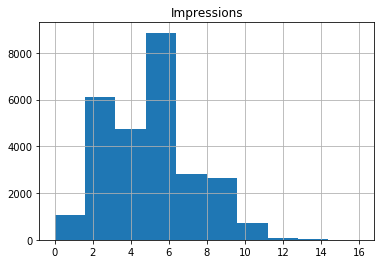

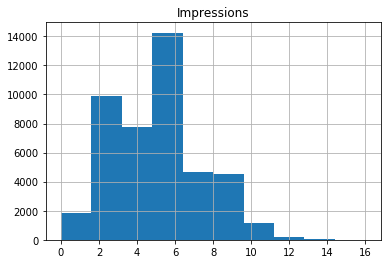

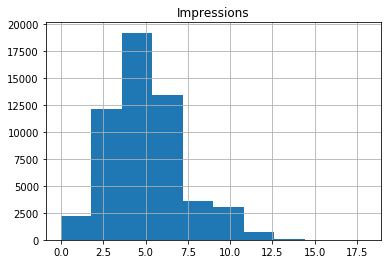

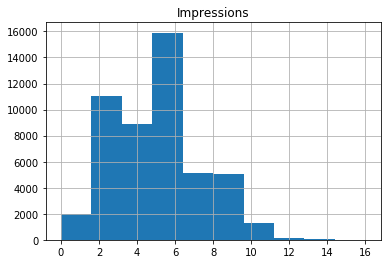

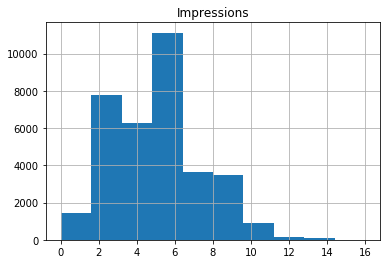

In [6]:
df.groupby(['ageRange']).hist(column='Impressions')

Next we want to plot the clicks per age group. It can be seen that the older people click slightly more often.
We also want to find out if there is a correlation between age, number of impressions and clicks.

ageRange
(0.999, 18.0]    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
(18.0, 24.0]     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
(24.0, 34.0]     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
(34.0, 44.0]     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
(44.0, 54.0]     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
(54.0, 64.0]     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

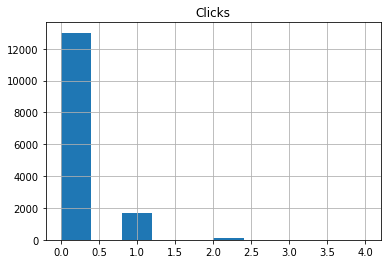

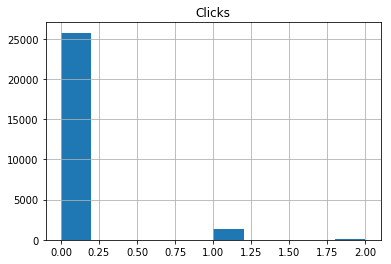

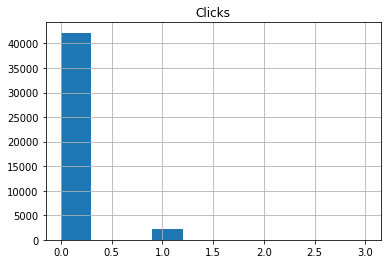

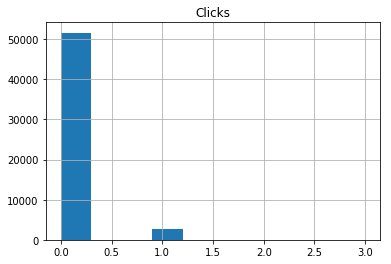

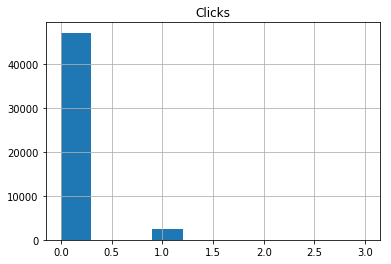

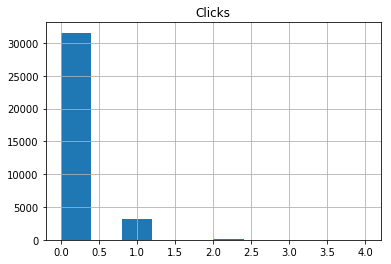

In [7]:
df.groupby('ageRange').hist(column='Clicks')

In [8]:
df_withOnlyClicks = df.drop(df[df.Clicks == 0].index)

Out of curiousity here is a correlation matrix of the three attributes. We can see that with p=0,05 there is a correlation between age and clicks.

In [9]:
df_withOnlyClicks = df_withOnlyClicks.drop(['Gender', 'Signed_In', 'ageRange'], axis=1)
corr = df_withOnlyClicks.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Impressions,Clicks
Age,1,-0.00552876,0.038963
Impressions,-0.00552876,1,0.0931131
Clicks,0.038963,0.0931131,1


Next we want to investigate into models which fit our data. First we draw a histogram with age bins on x-axis and the density of clicks and then we draw some theoretical models over it. We can see that beta and gamma works well.

In [10]:
model_age_clicks = df.drop(df[df.Clicks == 0].index)

In [11]:
model_age_clicks = model_age_clicks.drop(['Gender', 'Signed_In','Impressions', 'ageRange'], axis=1)

C:\Users\Christian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quit

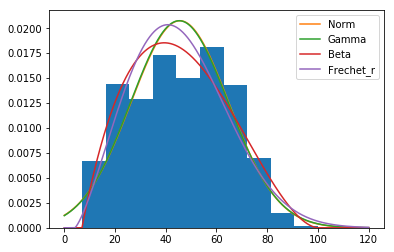

In [12]:
# create some normal random noisy data
#ser = 50*np.random.rand() * np.random.normal(10, 10, 100) + 20

# plot normed histogram
plt.hist(model_age_clicks.Age, normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(model_age_clicks.Age))

# lets try the normal distribution first
m, s = stats.norm.fit(model_age_clicks.Age) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

# exactly same as above
ag,bg,cg = stats.gamma.fit(model_age_clicks.Age)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma")

# guess what beta :) 
ab,bb,cb,db = stats.beta.fit(model_age_clicks.Age)  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta")

ab,bb,cb = stats.frechet_r.fit(model_age_clicks.Age)  
pdf_frechet_r = stats.frechet_r.pdf(lnspc, ab,bb,cb)  
plt.plot(lnspc, pdf_frechet_r, label="Frechet_r")

plt.legend()
plt.show()

Next we want to draw a histogram with number of impressions and the density of clicks. Before we delete all rows where no impressions where shown. Is not necessary, because in every row is some impressions. Drop everything but impressions and clicks. It can be seen that a Burr(type 3) fits the best.

In [13]:
model_impressions_clicks = df.drop(df[df.Clicks == 0].index)

In [14]:
model_impressions_clicks = model_impressions_clicks.drop(['Gender', 'Signed_In','Age', 'ageRange'], axis=1)

C:\Users\Christian\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Christian\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\Users\Christian\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


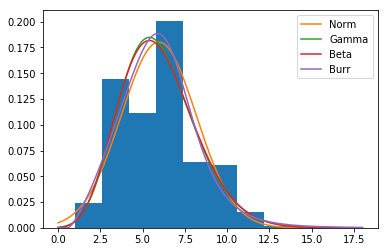

In [15]:
# create some normal random noisy data
#ser = 50*np.random.rand() * np.random.normal(10, 10, 100) + 20

# plot normed histogram
plt.hist(model_impressions_clicks.Impressions, normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(model_impressions_clicks.Impressions))

# lets try the normal distribution first
m, s = stats.norm.fit(model_impressions_clicks.Impressions) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

# exactly same as above
ag,bg,cg = stats.gamma.fit(model_impressions_clicks.Impressions)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma")

# guess what beta :) 
ab,bb,cb,db = stats.beta.fit(model_impressions_clicks.Impressions)  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta")

ab,bb,cb,db = stats.burr.fit(model_impressions_clicks.Impressions)  
pdf_burr = stats.burr.pdf(lnspc, ab,bb,cb,db)  
plt.plot(lnspc, pdf_burr, label="Burr")

plt.legend()
plt.show()

Now we calculate the confidence interval of the different age ranges and the number of clicks they make. First we need a dataframe with the age ranges and the number of clicks.

In [16]:
conf_ageRange_clicks = df.drop(df[df.Clicks == 0].index)
conf_ageRange_clicks = conf_ageRange_clicks.drop(['Gender', 'Impressions', 'Signed_In','Age'], axis=1)

In [17]:
stats = conf_ageRange_clicks.groupby(['ageRange'])['Clicks'].agg(['mean', 'count', 'std'])
ci95_hi = []
ci95_lo = []
for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

                   mean  count       std   ci95_hi   ci95_lo
ageRange                                                    
(0.999, 18.0]  1.077049   1830  0.286507  1.090176  1.063922
(18.0, 24.0]   1.031677   1389  0.175203  1.040891  1.022464
(24.0, 34.0]   1.023448   2175  0.154366  1.029936  1.016961
(34.0, 44.0]   1.023332   2743  0.153380  1.029072  1.017592
(44.0, 54.0]   1.029270   2494  0.175589  1.036162  1.022379
(54.0, 64.0]   1.054062   3311  0.235339  1.062078  1.046046


Another interesting confidence interval is number of impressions shown and the resulting clicks.

In [18]:
conf_impressions_clicks = df.drop(df[df.Clicks == 0].index)
conf_impressions_clicks = conf_impressions_clicks.drop(['Gender', 'ageRange', 'Signed_In','Age'], axis=1)

In [19]:
stats = conf_impressions_clicks.groupby(['Impressions'])['Clicks'].agg(['mean', 'count', 'std'])
ci95_hi = []
ci95_lo = []
for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

                 mean  count       std   ci95_hi   ci95_lo
Impressions                                               
1            1.000000    117  0.000000  1.000000  1.000000
2            1.005505    545  0.074056  1.011722  0.999287
3            1.020889   1484  0.143063  1.028168  1.013611
4            1.032520   2460  0.184162  1.039798  1.025243
5            1.036045   3024  0.191682  1.042877  1.029213
6            1.042560   2984  0.203551  1.049864  1.035257
7            1.053880   2487  0.241326  1.063365  1.044396
8            1.068430   1739  0.268029  1.081028  1.055833
9            1.072491   1076  0.273387  1.088826  1.056155
10           1.109428    594  0.357731  1.138196  1.080659
11           1.086093    302  0.303696  1.120345  1.051840
12           1.125000    112  0.382618  1.195862  1.054138
13           1.037037     54  0.190626  1.087881  0.986193
14           1.120000     25  0.439697  1.292361  0.947639
15           1.000000      8  0.000000  1.000000  1.0000

For the tests we divide the age into two groups. The means for the clicks are in both groups similar. The resulting p-value is smaller than 0.05 and therefore we can say that there is a significant difference between both age groups.

In [20]:
testAgeOldYoung = df.drop(df[df.Clicks == 0].index)

In [21]:
testAgeOldYoung = testAgeOldYoung.drop(['Gender', 'ageRange', 'Signed_In', 'Impressions'], axis=1)

In [22]:
testAgeYoung = testAgeOldYoung[testAgeOldYoung.Age < 46]
testAgeOld = testAgeOldYoung[testAgeOldYoung.Age >= 46]

In [25]:
stats.ttest_ind(testAgeYoung.Clicks,testAgeOld.Clicks)

Ttest_indResult(statistic=-5.782978274144743, pvalue=7.467645661505654e-09)

The next test is for the two genders. The resulting p-value says that there is no significant difference between both genders in the number of clicks they did.

In [26]:
testBothGenders = df.drop(df[df.Clicks == 0].index)
testBothGenders = testBothGenders.drop(['Age', 'ageRange', 'Signed_In', 'Impressions'], axis=1)

In [27]:
testMale = testBothGenders.drop(testBothGenders[testBothGenders.Gender == 0].index)
testFemale = testBothGenders.drop(testBothGenders[testBothGenders.Gender == 1].index)

In [28]:
stats.ttest_ind(testMale.Clicks,testFemale.Clicks)

Ttest_indResult(statistic=-1.845716751824337, pvalue=0.06495070677182689)

## Summary
The Dataframe has 5 columns. The first one shows the age, the second one the gender 0=female; 1=male, Impressions range from 0-18 and signed_in is either 1=yes or 0=no. It can be seen that women get more impressions than men. Next it can be seen that teenagers get fewer impressions (most of them around 4). Most of the older people get about 5-6 impressions. Of every age group the vast majority does not click on any impression. The youngest and oldest age group clicks most on impressions. Another thing which can be observed is that the two attributes age and clicks correlate.
A good theoretical model for the density of clicks for the different ages is gamma and beta. For the density of clicks for the different number of impressions, a good model would be Burr(type 3). For the confidence intervals, all of the the intervals are around 1 because the vast majority of people who clicked on a impression clicked only on one.
Last for the t-tests it can be said there is a significant difference for the number of clicks between young and older people - the cut is the mean of 46 years. For the two genders there is no difference for the number of clicks. The used dataset for the analysis was number 16.